<a href="https://colab.research.google.com/github/veeramika/accelerate-ecommerce/blob/master/Product_discoverability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
cd gdrive/My drive/Colab Notebooks/Myntra Project/dataset/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image.csv - Sheet1 (1).csv to image.csv - Sheet1 (1).csv


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from scipy import spatial
from operator import itemgetter
import numpy as np 
import pandas as pd
from tqdm import tqdm 

In [ ]:
"""VGG model"""
vgg19 = VGG19(weights='imagenet', include_top=True, pooling='max', input_shape=(224, 224, 3))

"""creates basemodel"""
basemodel = Model(inputs=vgg19.input, outputs=vgg19.get_layer('fc2').output)

574717952/574710816 [==============================] - 7s 0us/step


In [ ]:
import tensorflow as tf 

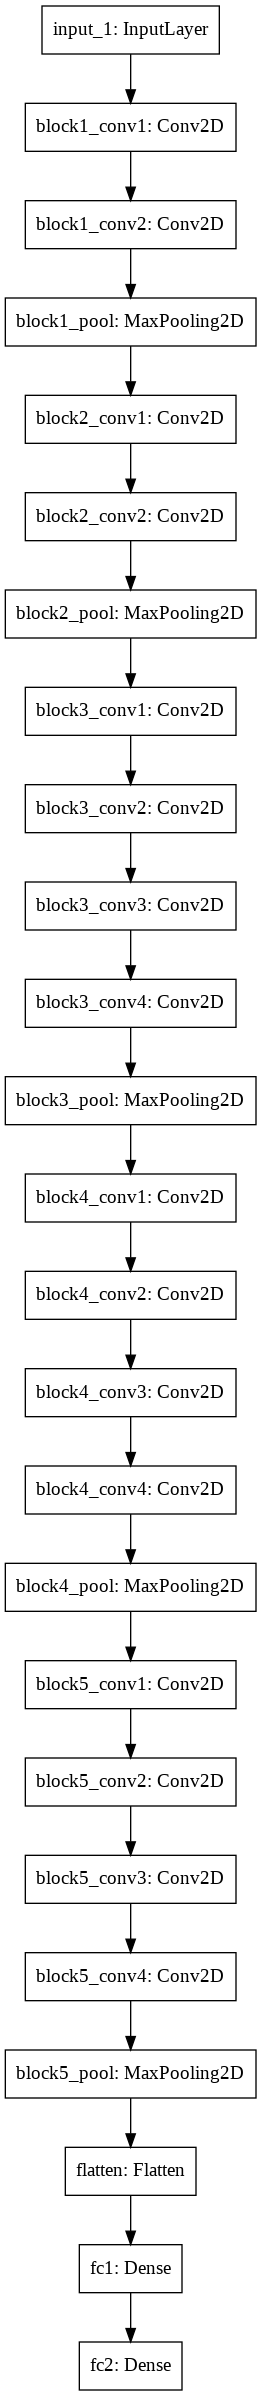

In [ ]:
tf.keras.utils.plot_model(
    basemodel, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
basemodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
"""function to get features of images using basemodel"""
def get_features(url):
    img=image.load_img(url, target_size=(224, 224))
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    x=preprocess_input(x)
    return basemodel.predict(x)

In [ ]:
"""Function to calculate cosine distance of two images embeddings"""
def calculate_similarity(vector1, vector2):
    return 1 - spatial.distance.cosine(vector1, vector2)

In [ ]:
"""Function that takes two images as input and returs their similarity score"""
def getSIMILARITY(url1, url2): 
    try: 
        x1=get_features(url1) 
        x2=get_features(url2) 
        return calculate_similarity(x1, x2)
    except:
        print("An exception occurred")
        return -1

In [ ]:
"""function to show images"""
def show_img(url):
    from matplotlib import pyplot
    img = image.load_img(url)
    pyplot.imshow(img)
    pyplot.show()

In [ ]:
#reads the list of dresses
df=pd.read_csv("image.csv - Sheet1 (1).csv")

In [ ]:
df.head()

,img
0,f1.jpeg
1,f2.jpeg
2,f3.jpeg
3,f4.jpeg
4,f5.jpeg


In [ ]:
dress_list=df['img'].to_list()

In [ ]:
print(dress_list)

['f1.jpeg', 'f2.jpeg', 'f3.jpeg', 'f4.jpeg', 'f5.jpeg', 'f6.jpeg', 'f7.jpeg', 'f8.jpeg', 'f9.jpeg', 'f10.jpeg', 'flare1.jpeg', 'flare2.jpeg', 'flare3.jpeg', 'flare4.jpeg', 'flare5.jpeg', 'flare6.jpeg', 'flare7.jpeg', 'flare8.jpeg', 'flare9.jpeg', 'flare10.jpeg', 'polka1.jpeg', 'polka2.jpeg', 'polka3.jpeg', 'polka4.jpeg', 'polka5.jpeg', 'polka6.jpeg', 'polka7.jpeg', 'polka8.jpeg', 'polka9.jpeg', 'polka10.jpeg', 'r1.jpeg', 'r2.jpeg', 'r3.jpeg', 'r4.jpeg', 'r5.jpeg', 'r6.jpeg', 'r7.jpeg', 'r8.jpeg', 'r9.jpeg', 'r10.jpeg', 's1.jpeg', 's2.jpeg', 's3.jpeg', 's4.jpeg', 's5.jpeg', 's6.jpeg', 's7.jpeg', 's8.jpeg', 's9.jpeg', 's10.jpeg']


In [ ]:
#list to store the images with their similarity scores
score_img=[]
for i in tqdm(range(0,len(dress_list))):
  score=getSIMILARITY(dress_list[i], 's1.jpeg')
  temp=[score,dress_list[i]]
  score_img.append(temp)

100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


In [ ]:
#sort the list w.r.t. simlarity score
score_img = sorted(score_img, key=itemgetter(0),reverse=True)

In [ ]:
print(score_img)

[[1.0, 's1.jpeg'], [0.7835793495178223, 's8.jpeg'], [0.7749112248420715, 's2.jpeg'], [0.7694611549377441, 'flare3.jpeg'], [0.762729823589325, 'flare10.jpeg'], [0.7253159880638123, 's3.jpeg'], [0.7098894119262695, 'r10.jpeg'], [0.7023715972900391, 'polka7.jpeg'], [0.6808657646179199, 's9.jpeg'], [0.6541244983673096, 's4.jpeg'], [0.6490755081176758, 'flare8.jpeg'], [0.6431482434272766, 'flare5.jpeg'], [0.6423870325088501, 's5.jpeg'], [0.6363027691841125, 'flare1.jpeg'], [0.6306114196777344, 's7.jpeg'], [0.6144741773605347, 's10.jpeg'], [0.6063092947006226, 'polka10.jpeg'], [0.5969736576080322, 'r5.jpeg'], [0.5800432562828064, 'flare9.jpeg'], [0.5704270601272583, 'flare4.jpeg'], [0.570012092590332, 'r7.jpeg'], [0.5598897337913513, 'r3.jpeg'], [0.5585095286369324, 'flare2.jpeg'], [0.557002604007721, 'r4.jpeg'], [0.5441257953643799, 'polka1.jpeg'], [0.5441257953643799, 'polka4.jpeg'], [0.5363803505897522, 'flare6.jpeg'], [0.5332786440849304, 's6.jpeg'], [0.51608806848526, 'f9.jpeg'], [0.494

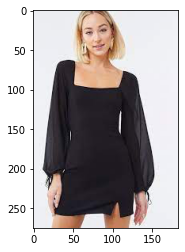

In [ ]:
show_img('s1.jpeg')

In [ ]:
"""function to list top 10 images"""
def show_top_10(ll):
  for i in range(0,10):
    show_img(ll[i][1])

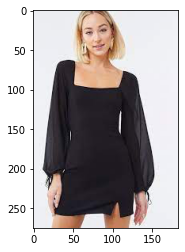

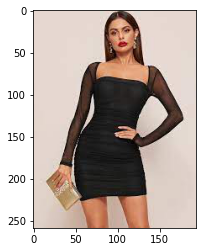

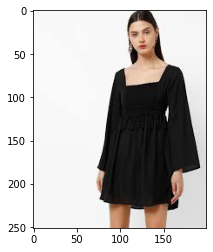

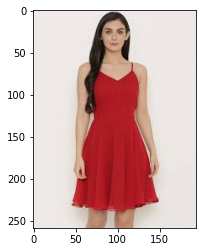

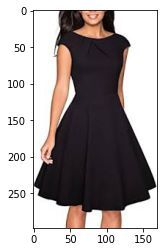

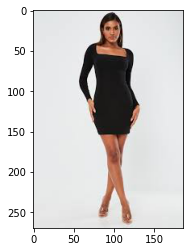

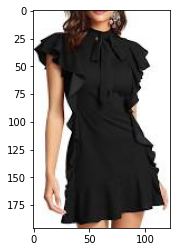

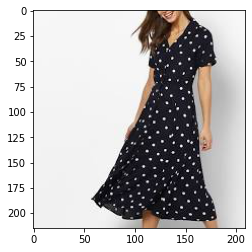

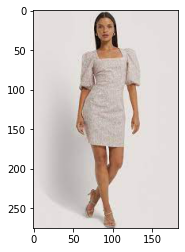

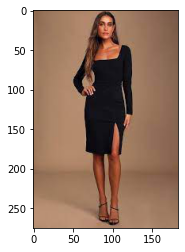

In [ ]:
show_top_10(score_img)